Zalecamy nie czytać notatników na githubie, ze względu na źle wyświetlające się wizualizacje i brak możliwości uruchamiania kodu. Polecamy otworzyć notatnik w google colab, następującym linkiem:

<a target="_blank" href="https://colab.research.google.com/github/asia281/StaszicAI/blob/main/04-06/Introduction_to_Neural_Networks.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Plan:
1. Czym są sieci neuronowe?
2. Perceptron
3. Idea trenowania modeli
4. Bardziej złożone sieci - architektura
5. Backpropagation
6. Funkcja kosztu
7. Kolejne kroki w treningu
8. Słowniczek :)

# 1. Czym są sieci neuronowe?

* odzwierciedlają działanie mózgu człowieka, składają się z węzłów (neurons/ nodes), które równolegle przetwarzają fragmenty inputu, działając jak komórki w mózgu
* neuron to miejsce, które przechowuje funkcję, która dla podanego jej inputu wypluwa liczbę np. między 0 a 1
* neurony są połączone ze sobą

# 2. Perceptron
* prosty liniowy klasyfikator (tylko używany dla liniowo separowalnych przykładów):

$$g\textbf{(x}_j; \textbf{w}, \theta)=\begin{cases}
  1 \text{ if }\textbf{w}^T\textbf{x}_j\geq\theta\\
  0 \text{ otherwise }
  \end{cases}$$

dla:
* $\textbf{x}_j$ - j-ta obserwacja w inpucie
* $\textbf{w}$ - wektor wag
* $\theta$ - threshold (próg)
* $g\textbf{(x}_j; \textbf{w}, \theta)$ - output

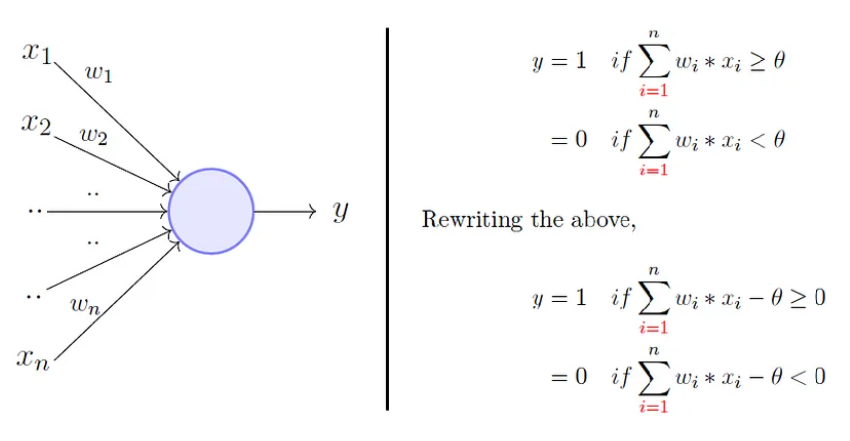

# 3. Idea trenowania modeli
* cel: odpowiedzi modelu są zbliżone (względem jakiejś metryki) do tego, co uważamy za ground truth naszego problemu
* jak: dla pewnego wektora $\textbf{w}$ liczymy jak model sobie radzi. Następnie, bazując na tej jego ocenie zmieniamy wektor $\textbf{w}$ oraz threshold $\theta$ i obserwujemy. Jak źle, to dalej zmieniamy, jak satysfakconujące wyniki, to kończymy.
* w praktyce: dajemy modelowi ileś iteracji takiego procesu (epok) i obserwujemy jak się zmieniają wyniki, czy w stronę jakiej oczekiwaliśmy. Jak tak, to się cieszymy, jak nie, to zmieniamy parametry i puszczamy do skutku 😀

#### Rodzaje problemów:
* liniowo separowalne - perceptron rozwiąże $$y=\begin{cases}
  1 \text{ for } x>4\\
  0 \text{ otherwise }
  \end{cases}$$
* nieliniowo separowalne np XOR  - perceptron nie rozwiąże

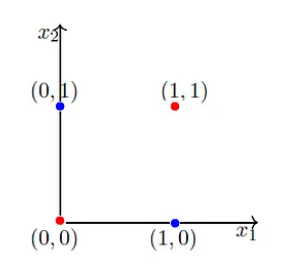

# 4. Bardziej złożone sieci - architektura

* dla bardziej skomplikowanych problemów, używamy większych sieci (czyli używamy ich prawie zawsze)
* sieci mają warstwy - input layer, hidden layers, output layer
pierwsza z nich jest długości takich jak liczba elementow w pojedynczej obserwacji w naszym zbiorze: jeśli jest to wektor [1,5] to jest ich 5, jeśli obrazek [28,28] to 28*28=784. Każdy z tych neuronów przechowuje liczbę reperezentującą wartość np (dla obrazków) w skali szarości danego piksela. 0 to czarny, 1 to biały. Te wartości to aktywacje naszych neuronów.
* w przypadku próby rozpoznania jaka jest cyfra przedstawiona na obrazku, mamy 10 możliwych outputów, stąd na warstwie wyjściowej mamy 10 neuronów, a każdy z nich przechowuje wartość od 0 do 1 z informacją od modelu, jak pewny model jest, że to jest ta liczba
* pomiędzy input a output layer są warstwy ukryte, które pomagają modelowi się nauczyć, jak z inputu zrobić output
* czy hidden layers mają jakieś z góry ustalone rozmiary, czy jest ich jakaś konkretna liczba? Nie, to ustawiamy eksperymentalnie lub robiąc research i patrząc co działa 😀

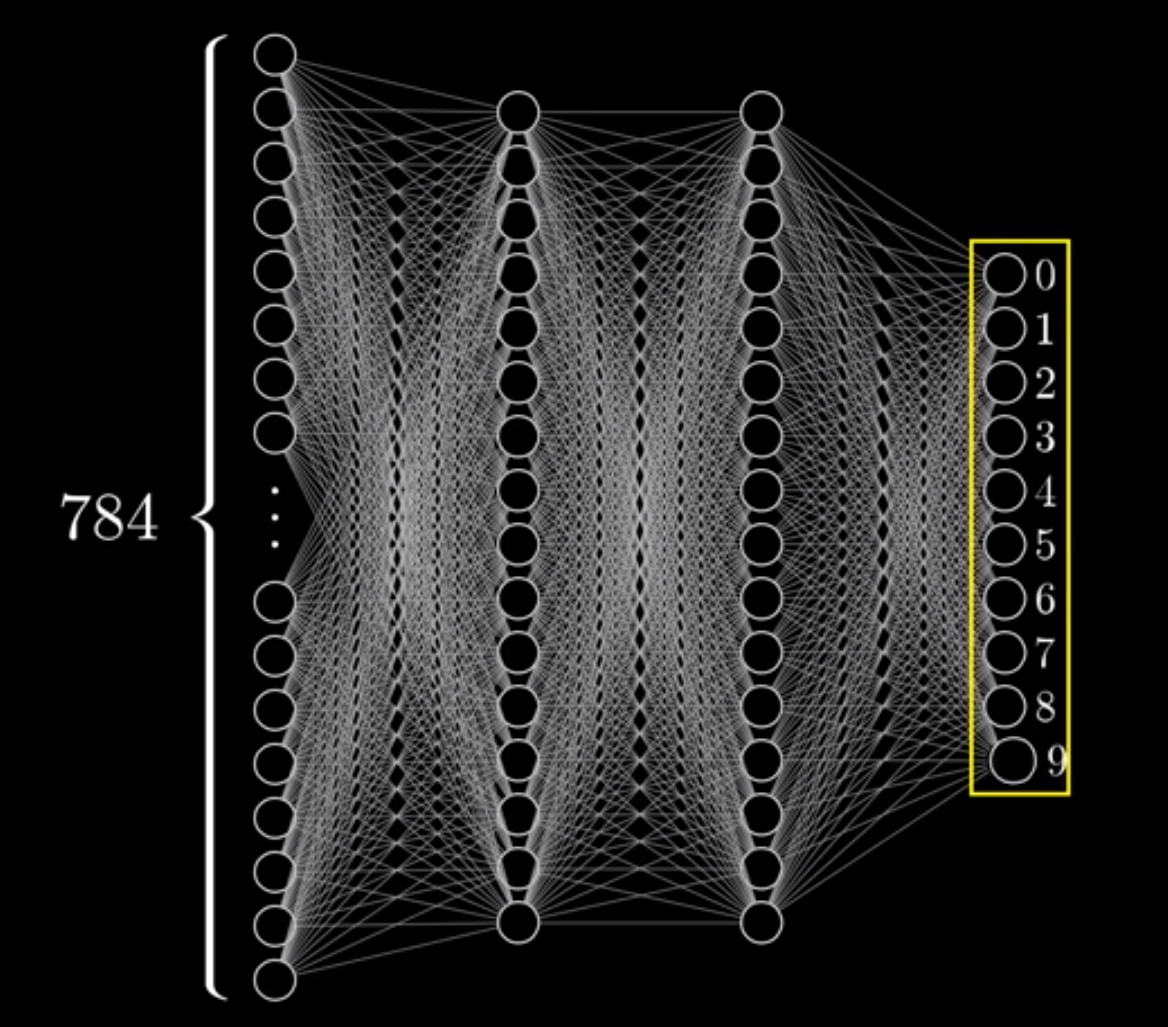

https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi [od 4:09 do 5:30] - wizualizacje przejść przez sieć


### Działanie sieci:
* gdy aktywują się jakieś neurony w jednej warstwie, determinuje to aktywacje w kolejnej
* to w jaki sposób jedna aktywacja powoduje kolejną, jest dokładnie tym, co ustawiamy wszystkimi parametrami podczas tworzenia sieci
* wagi na krawędziach o tym decydują - krawędzi łączą neurons z jednej warstwy do drugiej (nie ma połączeń między neuronami w tej samej warstwie)
* sieć definiuje się poprzez podanie m.in. liczby warstw, ile neuronów jest w której warstwie a także funkcje aktywacji.

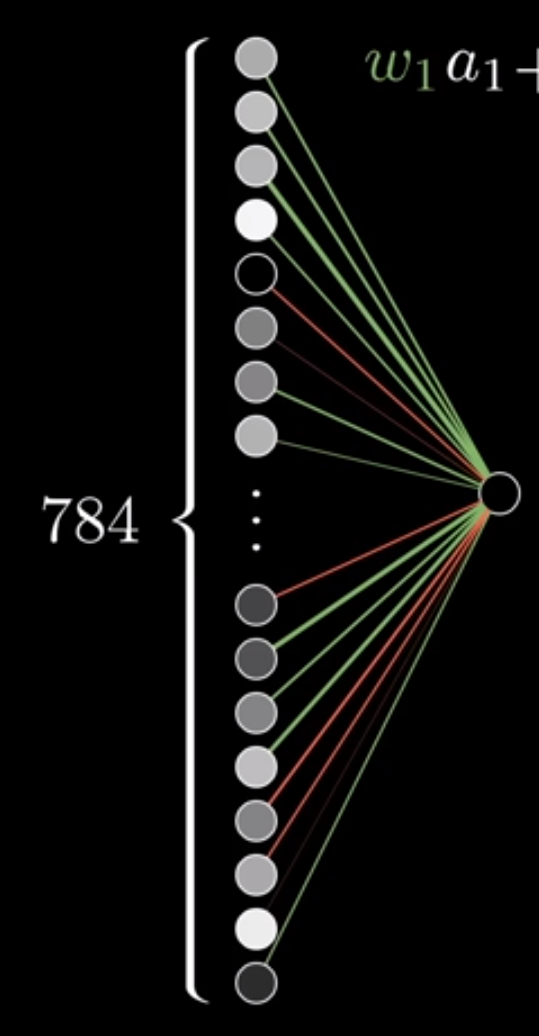

zielone - dodatnie, czerwone - ujemne, grubość mówi o wartości

wartość w nowym pikselu=ważona suma=$\sum_{i=1}^{n} w_i*a_i$, ale wtedy może nam wyjść dowolna liczba, zarówno dodania jak i ujemna. A my chcemy, aby była ona np między 0 a 1, więc potrzebujemy funkcję, która nam to zrobi np sigmoid: $$\sigma(x)=\frac{1}{1+e^{-x}}$$

Wtedy aktywacja neuronu=$\sigma(\sum_{i=1}^{n} w_i*a_i)$. Jeśli jednak chcielibyśmy, aby nasz neuron zapalił się tylko gdy suma będzie większa niż 10, a nie 0, to wystarczy, że dodamy `bias` czyli w praktyce aktywacja neuronu = $\sigma((\sum_{i=1}^{n} w_i*a_i)-10)$.

I tak się dzieje dla każdego neuronu, że jest on połączony w różnym stopniu z poprzednimi neuronami oraz ma dodany swój bias. Co w skrócie zapisujemy jako: $a^{(1)}=\sigma(\textbf{W}\textbf{a}^{(0)}+\textbf{b})$, gdzie $\textbf{W}$ to macierz wag, $\textbf{b}$ to wektor biasów, $\textbf{a}^{(0)}$ to aktywacje na 0 warstwie.

A ponieważ tych wag i biasów jest tak wiele, to szukanie tych właściwych nie jest takie oczywiste. I tym właśnie zajmuje się uczenie sieci.

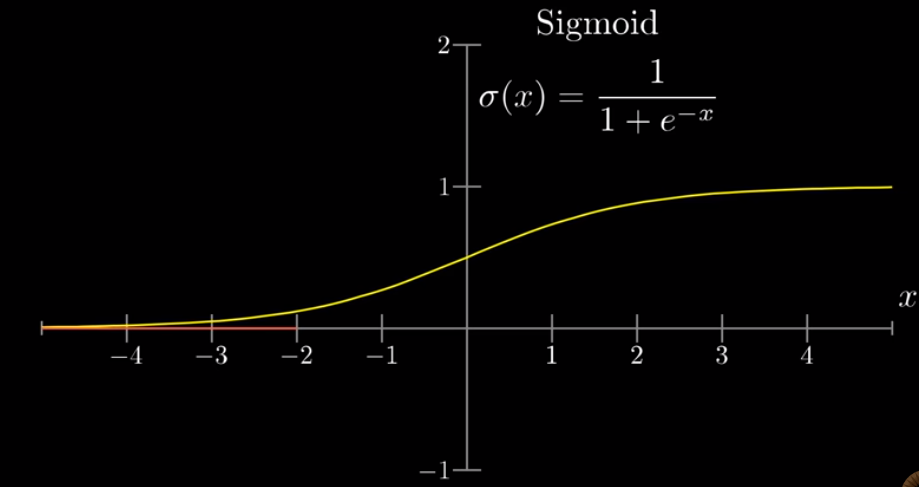

#### Funkcja kosztu
* sposób powiedzenia naszemu algorytmowi, że się myli i jak bardzo.
* pewnego rodzaju matematyczna różnica między danymi treningowymi a aktualnym outputem modelu. Liczona dla każdej obserwacji w danych osobno np jako kwadrat różnicy między prawidłową odpowiedzią a aktualnym prawdopodobieństwem zwróconym przez model. W takim wypadku im mniejszy taki kwadrat, tym lepszy model dla danego przykładu. A gdy uśrednimy wartości dla wszystkich obserwacji, mamy miarę jakości naszego modelu.
* celem uczenia sieci jest zminimalizowanie tego błędu
* ponieważ nie chcemy szukać w ciemno, jak zminimalizować ten błąd, szukamy (z pomocą równań matematycznych) kierunku, w którym mamy małym krokiem przesunąć nasze parametry, aby wynik był lepszy (gradient descent)
* nasze parametry możemy zmiejszać, powiększać, delikatnie lub więcej, ponieważ różne neurony moga mieć większe znaczenie, a inne mniejsze,
* cały taki proces nazywa się backpropagation

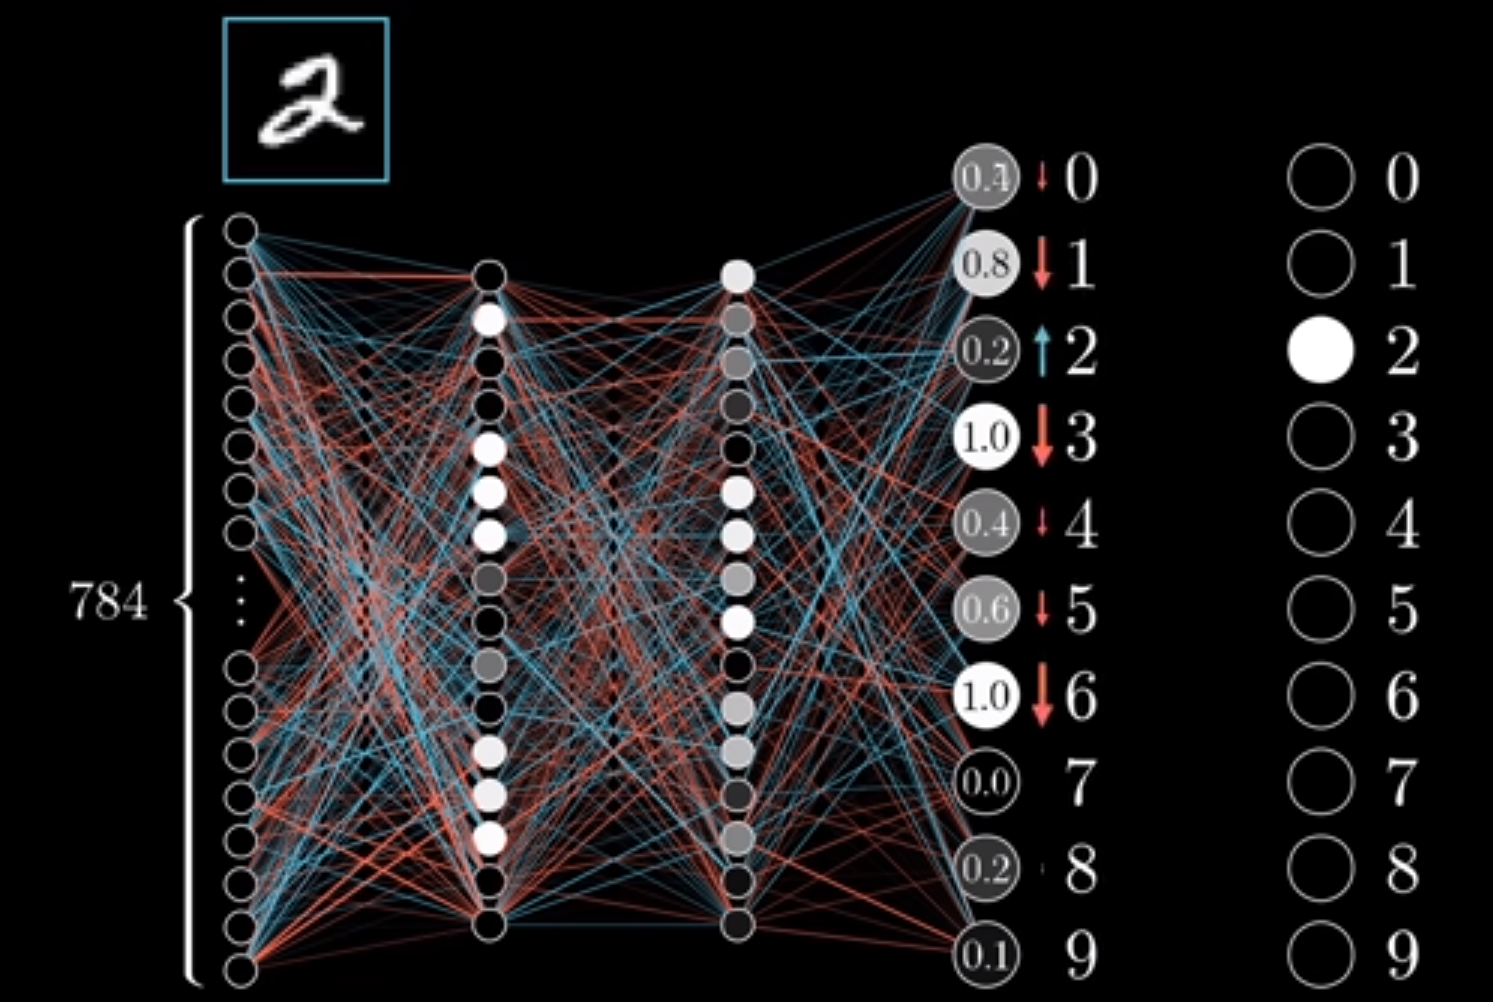

## 5. Backpropagation

* szukanie gradientu: $-∇C(\textbf{W})$ dla $\textbf{W}$ będącego wszystkimi wagami i biasami
* https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=3 [od 3.07 do 9.33]

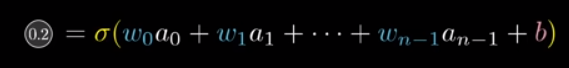

Co możemy zrobić? $b$ możemy zwiększyć, $w_i$ również lub zmienić $a_i$. I tak dla każdego neuronu na ostatniej warstwie. Wszystkie te zmiany dodajemy do siebie, dla każdego neuronu na poprzedniej warstwie. I w ten sposób mamy informację, jakie wartości byśmy chcieli zobaczyć na przedostatenij warstwie. I analogicznie robimy z pozostałymi warstwami, cofając się warstaw po warstwie. Dla każdego neuronu robimy średnią z takich wartości zmian policzonych dla całego zbioru danych. I to co policzyliśmy, to wyrażenie proporcjonalne do minus gradientu funkcji kosztu czyli $-\eta∇C(\textbf{W})$.

## 6. Funkcja kosztu

* Mean-squared error (MSE) - dla regresji
$$ MSE = \frac{1}{n} \sum(y_i- \hat y_i)^2$$
  * n - liczba obserwacji
  * $y_i$ - przewidziana wartość dla i-tej obserwacji
  * $\hat y_i$ - target value dla i-tej obserwacji
* Cross-entropy - dla klasyfikacji (binarnej)
$$ L(y, f(x)) = - [y*log(f(x))+(1-y)*log(1-f(x))] $$
  * $y$ - prawdziwa labelka 0 lub 1
  * $f(x)$ - przewidziane prawdopodobieństwo klasy pozytywnej

## 7. Kolejne kroki w treningu
1. dla danych wejściowych obliczyć predykcję modelu, zapamiętując wartości w neuronach (aktywacje)
2. policzyć błąd predykcji - między predykcją a ground truth
3. policzyć gradient funkcji kosztu
4. update parametrów modelu
5. jeśli nie było jeszcze wystarczająco dużo epok, wróć do pkt 1.

## 8. Słowniczek :)
* epoka - ile razy cały taki pipeline wykonamy (od policzenia predykcji aż do update parametrów modelu),
* lr - learning rate - jak bardzo zmieniamy wagi o gradient, czyli $\eta$ we wzorze: $-\eta∇C(\textbf{W})$,
* stopping criterium - jeśli loss się zmienia o zbyt małą wartość, to chcemy, by sieć zakończyła uczenie, bo nie ma ono sensu,
* optimizer - pomaga bardziej optymalnie liczyć gradient.

### Źródła i inspiracje:
* https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975
* https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi
* https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/\
* https://www.youtube.com/watch?v=IHZwWFHWa-w&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=2
* https://www.youtube.com/watch?v=Ilg3gGewQ5U&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=3